## A Hands-on Workshop series in Machine Learning
### A Gentle Introduction to Neural Networks
#### Instructor: Dr. Aashita Kesarwani

What is Deep Learning?

Why the sudden growth in the applications of Deep Learning?   
1. Data availability
2. Computing power 

<center>
<img src="https://cdn-images-1.medium.com/max/1600/0*GTzatEUd4cICPVub." width="600" />
</center>

Data may consists of pairs (input, output). 

| Input  | Output |
| ------ | ------ |
| Photos | Label: cats, dogs, birds, etc. |
| Emails | Label: Spam or not |
| House characteristics | House prices |
| A sentence in English | Its translation in Spanish |

The first step is to convert the real world entity, such as an email, image or other data, into feature vectors.

Let us assume for the rest of the session that our training data is already pre-processed and converted into feature vectors. For $n$ features, a feature vector is nothing but a point in the $n$-dimensional space viz. $x = (x_1, x_2, \dots, x_n)$.

For supervised machine learning algorithm, the goal is to best estimate the mapping function $f$ for the output variable $y$ given the input data $X$. 

There are two major tasks for supervised machine learning: 
- Classification
- Regression

We studied one binary classification algorithm - logistic classifer in the previous session, for which the output variable $y$ is one of the classes - 0 or 1 for the input data $X$. Let us start with our first regression algorithm in today's session. 


#### Regression:   
- Fitting a curve to determine the impact of feature variables on the target variable.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Gaussian_kernel_regression.png" width="300" />
<p style="text-align: center;"> Regression curve </p> 
</center>

Linear Regression: Fitting a ***line*** to determine the impact of feature variables on the target variable.

<center>
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/linregline.png?raw=True" width=400 />
</center>
    
Note that $X$ consists of independent variables, whereas $y$ target ouput and we want to approximate a function $f: X \to y$

For example, let $x$ be the square feet area of the house and $y$ be the selling price of the house.

<center>
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/linreglines.png?raw=True" width=400 />
</center>

* Which one of the above two lines is a better fit? Red or Green?
* Can there be an even better fit? How do we find out?
* What precisely are we looking for in the line that is the best fit?

Answer: We are trying to minimize the error in predictions given by the line vs the actual target value.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png" width="400" />
</center>

The simple linear regression (linear regression with one variable) is formulated as $ y_{pred} = w * x + b $.

Finding the best fit line simply means ***finding the optimal values for $w$ and $b$***. For that, we need to quantify the cost function (also known as the error function or the loss function) that we can minimize. 

* How do we formulate the cost function?
* Should we sum up the errors? If not, why?

The simple linear regression model uses the mean-squared error (MSE) as the cost function. We square the errors and then take their average.

$$ J = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})^2 $$

Alternatively, we can use Mean-absolute Error (MSE) as the cost function for regression:
$$ J = \frac{1}{n} \sum_{i=1}^n |y^{(i)} - y_{pred}^{(i)}| $$


The cost function is inherently a function of the slope and intercept. This is evident once we substitute $y_{pred}$ with the regression line.

$$ J(w, b) = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - (w * x^{(i)} + b) )^2 $$

The [gradient descent algorithm](https://machinelearningmastery.com/gradient-descent-for-machine-learning/), introduced in the last session, can then be used to minimize the above cost function by updating the weights iteratively. 

Revision: How does the gradient descent algorithm work?
* We start with some weights initially
* Let the model make prediction $y_{pred}$ for a training example $x$
* Compute the cost using the prediction $y_{pred}$ and the actual target $y$ 
* Compute the gradient of the cost and use it to update the weights
* Repeat the above steps for another training example

The weights are updated in the direction of the steepest descent of the cost function in each iteration. 

$$ w := w - \alpha \nabla J $$

where $\nabla J$ is the gradient of the cost function $J$ and $\alpha$ is the learning rate that determines the size of steps that we take descending on the path of gradient.


<center>
<img align="center"  src="https://github.com/AashitaK/datasets/blob/main/images/ball.png?raw=True" width="450" />
<p style="text-align: center;"> Minimizing the cost function using gradient descent </p> 
</center>

To derive the formula for updating weights using gradient descent, we first take the partial derivative, 
$$ \frac{\partial J}{\partial w} = - \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
And substitute it in the above equation to get
$$ w := w + \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
Similarly,
$$ b := b + \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   $$

To summarize, *we defined a cost function to quantify the error in predicting outputs and then we update the weights so as to minimize the cost in the fastest way with the help of gradient descent algorithm*.

In the other notebook titled *Linear regression implementation using gradient descent*, the above gradient descent algorithm is implemented so that the regression line is being updated iteratively and the cost is declining with every iteration.

<center>
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/linregfit.png?raw=True" width=700 />
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/linregcost.png?raw=True" width=500 />
</center>

**Exercise**: If you were to implement the above algorithm, what major functions would you need to implement? What would the code look like for the iterative process of weight updates?

You can use [scikit-learn](https://scikit-learn.org/stable/) implementation of the linear regression as demonstrated below while working on problems. The linear regression is often good as a baseline model, and this implementation is fast and require very little code. 

First we import the function [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and then initialize the regressor.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('sample_boston.csv')
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

c:\Users\Marwa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Then we train the regressor using the [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method on the data points.

In [3]:
lin_reg.fit(X, y)

LinearRegression()

Next, we plot the regression line using the functions written in the python file `linreg.py`. 

In [4]:
def cost(X, y, w, b):
    n = len(y)
    J = 1/(2*n) * np.sum((y - (w*X + b))**2)
    return J

w = lin_reg.coef_[0]
b = lin_reg.intercept_
print("Weight:", w)
print("Intercept", b)
print("Cost:", cost(X, y, w, b))

Weight: 9.559377910614938
Intercept -38.406936727358584
Cost: 2266.746832851884


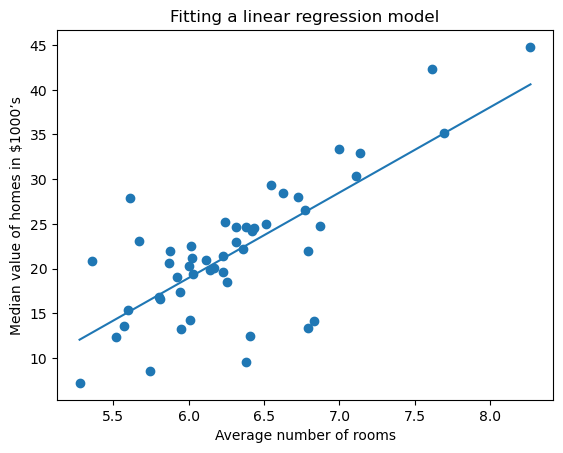

In [5]:
# Plot the points
plt.scatter(X, y)
# Plot the regression line
X_values = np.linspace(X.min(), X.max(), 100)
y_prediction = w*X_values + b
plt.plot(X_values, y_prediction);
plt.xlabel("Average number of rooms");
plt.ylabel("Median value of homes in $1000’s");
plt.title("Fitting a linear regression model");

#### Multivariate Linear Regression
The same formulation and understanding can be extended to linear regression with more than one variable, say $x_1, x_2, \dots, x_n$, with the equation 

$$ y_{pred} = b + w_1 * x_1 + w_2 * x_2 + \cdots + w_n * x_n$$ 

And we estimate the weights $w_1, w_2, \dots, w_n$ corresponding to each variable as well as the intercept.

&nbsp;

&nbsp;


Linear regression is the simplest example of a neural network with no hidden layers.

<center>
<img src="https://github.com/AashitaK/datasets/blob/main/images/NNLinReg.drawio.png?raw=True" width="400">
<p style="text-align: center;"> Neural network representation for linear regression </p> 
</center>

Notes:
* Increasing the weight for a variable means it is becoming more impactful in the prediction. 
* The weights for two variables cannot be compared straightway unless they are in same scale or are normalized to be in the same scale.

Though linear regression has a simple network architecture, it serves as a good demonstration for the learning process for the neural network. 

* We define the cost function to quantify the error in prediction, which is effectively a function of weights and bias term. 
* We use a dataset to learn the optimal weights of the network. We call it the training dataset. 
* Minimizing the cost function using the training data yields the desired weights. The gradient descent algorithm is used for this learning process.



## Classification: 


Machine learning approach to classification task: 
We are given some labeled data which we use to determine the decision boundary. Then, we use this decision boundary to classify the yet unseen examples into the given categories.

<center>
<img src="https://github.com/AashitaK/datasets/blob/main/images/DecisionBoundary.png?raw=True" width="500" />
</center>

For simplicity, let us assume we have only two classes:
* the positive class labeled as 1 
* the negative class labeled as 0

Can we somehow modify the neural network architecture we studied earlier for linear regression to build a binary classifier?

<center>
<img src="https://github.com/AashitaK/datasets/blob/main/images/NNLinReg.drawio.png?raw=True" width="400">
<p style="text-align: center;"> Neural network representation for linear regression </p> 
</center>

Simplest but outdated trick was to use the threshold to get the neuron fired or not.

<center>
<img src="https://cdn-images-1.medium.com/max/2600/1*v88ySSMr7JLaIBjwr4chTw.jpeg" width="500" />
<p style="text-align: center;"> A Perceptron Classifier</p>
</center>

The bias term let us set a threshold so that if the weighted input sum is greater than 0, then the neuron fires or else it does not. When the neuron fires, we classify the example as belonging to the positive class, otherwise the negative class. 

The function that was used to determine whether the neuron fires or not is called the activation function. Note that it is the unit step function.

\begin{equation} \label{eq1}
\begin{split}
f(x) & = 1 \text{ if } w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b \geq 0\\      
& = 0 \text{ otherwise}
\end{split}
\end{equation}

***Exercise 1:***

Q1: Can you come up with a neural network for the OR gate by trail-and-error?
<br/>

<img align="left" src="https://github.com/AashitaK/datasets/blob/main/images/or.png?raw=True"/>
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/or-gate.gif?raw=True" width="410" /> 


Hint:
- Step 1: How many input nodes should we have? Do not forget the bias term.
- Step 2: Sketch the neural network and put the variables with names on it, such as $x_1, x_2, b, w_1, w_2$, etc.
- Step 3: Come up with some values for the weight and bias that will give the correct prediction for one of the points.
- Step 4: Update the weight and bias term, if necessary, to give correct predictions for another point as well as the previous one(s). Repeat for the remaining point(s).
<br/>

Note: You do not need to find the most optimal weights (and consequently the best decision bounadry line). Any weights that correctly classifies the four points will do!


Q2: Can you come up with a neural network for the AND gate?
<br/>
<img align="left" src="https://github.com/AashitaK/datasets/blob/main/images/and.png?raw=True" />
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/and-gate.gif?raw=True" width="410" /> 
<br/>
<center>
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/nn1.png?raw=True" width="600" /> 
</center>

Q3: Would a similar network work for the XOR gate?
<br/>
<img align="left" src="https://github.com/AashitaK/datasets/blob/main/images/xor.png?raw=True" />
<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/xor-gate.gif?raw=True" width="410" /> 

<h1> WORK</h1>

Q1: Notice that the decision boundary 


$ y = -1x + 1 $ is a decision boundary that works, we get that 

$$y + x - 1$$
$$(1,1)* (x,y) - 1$$

Additionally for the AND gat we have that 

$$(1,1)*(x,y) -0.5$$


Additionally, we have that 

$$(11)*(x,y) -1.5$$

also works, we can do this equivalently

https://jamboard.google.com/d/1ZXs0SzeaILSKesLRnApC-jtJQE6A1c3KPYn2EEGg8zw/viewer?f=0 



https://jamboard.google.com/d/1vUWM-SQK9WK4xgMD5ziBj12xMRc58HSdQNWgGF08VCI/viewer?f=0


The single-layer neural network that we used for the OR and AND gates can only give us a linear boundary. It is evident that it is simply not possible for a linear decision boundary to correctly classify all the points in XOR gate. 

It is pretty common for real-life classification problems to have non-linear decision boundaries. That is why we add hidden layers to the neural networks. The layers other than the input and output layers in the network are called hidden layers. Deep Learning typically means that the network is pretty deep (many hidden layers!).


<center>
<img src="https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png" width="450"/>
<p style="text-align: center;"> Multi-layer Perceptron </p>
</center>

***Exercise 2:***
Can you now come up with a neural network for the XOR gate?

Hint: XOR gate is equivalent to combining NAND (negative of AND) gate and OR gate with a AND gate. Can you fill in the weights for the XOR gate network? Use [jamboard here](https://jamboard.google.com/d/1yadCM1E_QF37uxcqd8Hhfz_05s1Dyc1rGdExayBQ5CM/edit?usp=sharing
) if you'd like.


<img align="left" src="https://github.com/AashitaK/datasets/blob/main/images/xor-gate-elaborate.png?raw=True"/>

See [solution here](https://drive.google.com/file/d/1k2enUhtaktvZ7OCdSp2o9oWqTiKN62i_/view?usp=sharing) for the XOR gate network.

The neural networks for classification we have seen so far outputs the class label for each input example.

In general, we want to classify the examples farther from the decision boundary with more certainity (or higher probability) than those closer to the decision boundary.  Hence, we want our classifier to give us the probabilities corresponding to each class, instead of the class label itself.


We have seen an example of a binary classification algorithm called Logistic Regression classifier, that separates the classes using Linear boundary.
<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*No261DjSDdX1-jXXVreW0g.png" width="600"/>
<p style="text-align: center;"> Logistic Regression classifier </p>
</center>

The Logistic regression model is given by,

$$Prob(y=1) = sig(w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b) $$ 

where $sig$ is the sigmoid logistic function 

$$sig(t) = \frac{1}{1+e^{-t}}$$

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width=400 />
</center>

  
  
The inspiration for our first neural network was the linear regression above. 
  
<center>
<img src="https://github.com/AashitaK/datasets/blob/main/images/NNLinReg.drawio.png?raw=True" width="400">
<p style="text-align: center;"> Neural network representation for linear regression </p> 
</center>
     
Can we also represent the logistic classifier, that also contains the weighted sum $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$ in its equation, as a neural network?




A: Yes, we simply add a layer for the sigmoid sum.

<center>
<img src="https://github.com/AashitaK/datasets/blob/main/images/NNLogistic.drawio2.png?raw=True" width="400">
<p style="text-align: center;"> Neural network representation for logistic classifier
    </p> 
</center>

It is called activation function. We will come back to other examples. One way to introduce non-linearity was the addition of hidden layer as seen above. The activation functions themselves also add non-linearity. For the logistic regression, we used the sigmoid function at the end. For neural networks, it is common to use activation function for each layer.

Let us formalize the neural networks introduced so far. There are two parts to the learning process:
1. Forward propagation: used to predict the output by propagating the input in the forward direction
2. Backward propagation: used to compute the weight updates for each layer by propagating the cost/error in the backward direction.


#### Forward propagation

The process of propagating the output of each layer in the forward direction to consequently get the final output is called forward propagation. 

The output of each hidden layer becomes the input of the next layer. The output is also called the activation for a layer.

The output/activation for each layer is computed in two steps:
* The weighted sum of the inputs, say $z_i$
* The activation function is applied to the above sum $z_i$ to produce the activation $a_i$

Equations:

$$
\begin{align}
z_1 &= x*W_1+b_1 \\
a_1 &= g_1(z_1) \\
z_2 &= a_1*W_2+b_2 \\
a_2 &= g_2(z_2) \\
\vdots \\
z_n &= a_{n-1}*W_n+b_n \\
a_n &= g_n(z_n) \\
\end{align}
$$

and so on till the final output $y_{pred} = a_n$.

Convention:  
$z_i$: weighted averages of the output from the $(i-1)^{th}$ layer  
$a_i$: activation/output of the $i^{th}$ layer  
$g_i$: activation layer of the $i^{th}$ layer  
$W_i$: Weight matrices connecting two layers   
$b_i$: Bias vector for the $i$-th layer  
$m$: Number of training examples

<center>
<img src="https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png" width="350" />
</center>
    
#### Backward propagation

The process of propagating the cost in the backward direction to compute the gradients for each layer so as to update the weights and bias is called backward propagation. 

Equations: 

$$
\begin{align}
W_n &:= W_n - \frac{1}{m}\alpha*\frac{\partial J}{\partial W_n}\\    
b_n &:= b_n - \frac{1}{m}\alpha*\frac{\partial J}{\partial b_n}\\
 \vdots \\
W_1 &:= W_1 - \frac{1}{m}\alpha*\frac{\partial J}{\partial W_1}\\   
b_1 &:= b_1 - \frac{1}{m}\alpha*\frac{\partial J}{\partial b_1}\\
\end{align}
$$

Here, $\alpha$ is the learning rate that is multiplied to the gradients to tune the size of each weight/bias update.

The gradients are computed using the chain rule for derivatives, as illustrated below in the exercise example.

One pass of each forward and backward propagation is called an iteration. When all the training examples are iterated once, it is called an epoch.  


***Exercise 3:*** 
In the above exercise, we came up with the weights for the neural network for the OR gate by trial-and-error method. Let us derive the **back propagation equations** so that we can find optimal weights for the network starting with random weights.

![](https://miro.medium.com/max/1113/0*wOYoifz24Wz_I152.)

The forward propagation equations will be:  
$ z_1 = w_1 x_1 + w_2 x_2 + b$  
$ a_1 = g(z_1) $  
$ y_{pred} = a_1 $  


Let the activation function be sigmoid 

$$ g(z) = \frac{1}{1+e^{-z}} $$

Let the cost function be $$ J = \frac{1}{2} \sum_{i=1}^4 (y^{(i)} - y_{pred}^{(i)})^2 $$

Derive the Back propagation equations by calculating the gradients (partial derivatives):   

$$ w_1 := w_1 - \alpha \frac{\partial J}{\partial w_1} $$  
$$ w_2 := w_2 - \alpha \frac{\partial J}{\partial w_2} $$  
$$ b := b - \alpha \frac{\partial J}{\partial b} $$  

Hint: Use the chain rule for derivatives

$$ \frac{d f(y)}{dx} =  \frac{d f(y)}{dy} \frac{d y}{dx}$$

<img align="center" src="https://github.com/AashitaK/datasets/blob/main/images/deepnn.png?raw=True" width=600 />


#### Summary:

Let us summarize what we have learned so far.

Terminology:
* Nodes
* Input layer
* Hidden layers
* Output layer
* Weights
* Bias
* Weighted sum $z_i$
* Activation functions $g_i$
* Activations $a_i$
* Cost function $J$
* Forward propagation
* Backward propagation
* Iterations
* Epochs
* Learning rate $\alpha$ 

#### How to address overfitting?
- Reduce the number of features 
    - Discard some features
    - Dimensionality reduction techniques such PCA, LDA, etc.
- Simplify the model (by tuning hyperparameters)
- Reducing the number of epochs for training the network
- Regularization, Dropout, etc.
- Adding more training examples, if possible  

<center>
<img src="https://i.stack.imgur.com/rpqa6.jpg" width="500"/>
</center>

In a nutshell, 
* **To reduce overfitting, reduce complexity.**
* **To reduce underfitting, increase complexity.**

We will learn the above concepts in more detail in the next session.